<a href="https://colab.research.google.com/github/AprilWuWu/AI-Portfolio/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

## Normalize


In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


bird


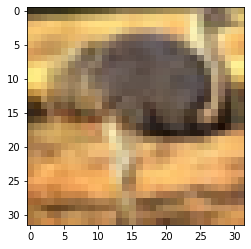

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
trans = [
      'airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck'
]

print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [ ]:
# https://keras.io/zh/layers/convolutional/

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

layers = [
  # [3 * 3 * 3](一個過濾器) * 64(個) + 64(bias) = 1792 
  Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
  MaxPooling2D(),
  Conv2D(128, 3, padding="same", activation="relu"),
  MaxPooling2D(),
  Conv2D(256, 3, padding="same", activation="relu"),
  # MaxPooling2D(),
  # Flatten(),
  GlobalAveragePooling2D(),
  # GlobalMaxPool2D(),
  Dense(256, activation="relu"),
  Dropout(0.25),
  Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

# 1792 = 3 * 3 * 3(前一層深度) * 64(64個特徵) + 64(bias)
# 73856 = 3 * 3 * 64 * 128 + 128
# 295168 = 3 * 3 * 128 * 256 + 256 
## Flatten 1048832 = 4096 * 256 + 256 
## GlobalAveragePooling2D 65792 = 256 * 256 + 256
# 2570 = 256 * 10 + 10 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               6

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
  ModelCheckpoint('cnn.h5', save_best_only=True),
  EarlyStopping(patience=5, restore_best_weights=True)           
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 3s - loss: 1.8955 - accuracy: 0.2798 - val_loss: 1.6342 - val_accuracy: 0.3890
Epoch 2/50
225/225 - 3s - loss: 1.5905 - accuracy: 0.4094 - val_loss: 1.5022 - val_accuracy: 0.4434
Epoch 3/50
225/225 - 3s - loss: 1.4336 - accuracy: 0.4753 - val_loss: 1.3467 - val_accuracy: 0.5138
Epoch 4/50
225/225 - 3s - loss: 1.3132 - accuracy: 0.5224 - val_loss: 1.2095 - val_accuracy: 0.5572
Epoch 5/50
225/225 - 3s - loss: 1.2044 - accuracy: 0.5651 - val_loss: 1.1330 - val_accuracy: 0.5990
Epoch 6/50
225/225 - 3s - loss: 1.1517 - accuracy: 0.5865 - val_loss: 1.0706 - val_accuracy: 0.6072
Epoch 7/50
225/225 - 3s - loss: 1.0894 - accuracy: 0.6084 - val_loss: 1.0040 - val_accuracy: 0.6398
Epoch 8/50
225/225 - 3s - loss: 1.0224 - accuracy: 0.6347 - val_loss: 0.9819 - val_accuracy: 0.6554
Epoch 9/50
225/225 - 3s - loss: 0.9790 - accuracy: 0.6532 - val_loss: 0.9510 - val_accuracy: 0.6680
Epoch 10/50
225/225 - 3s - loss: 0.9426 - accuracy: 0.6645 - val_loss: 0.9333 - val_accuracy: 0.6714

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.7815


[0.6396823525428772, 0.781499981880188]

In [ ]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# pre != y_test
y_test
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


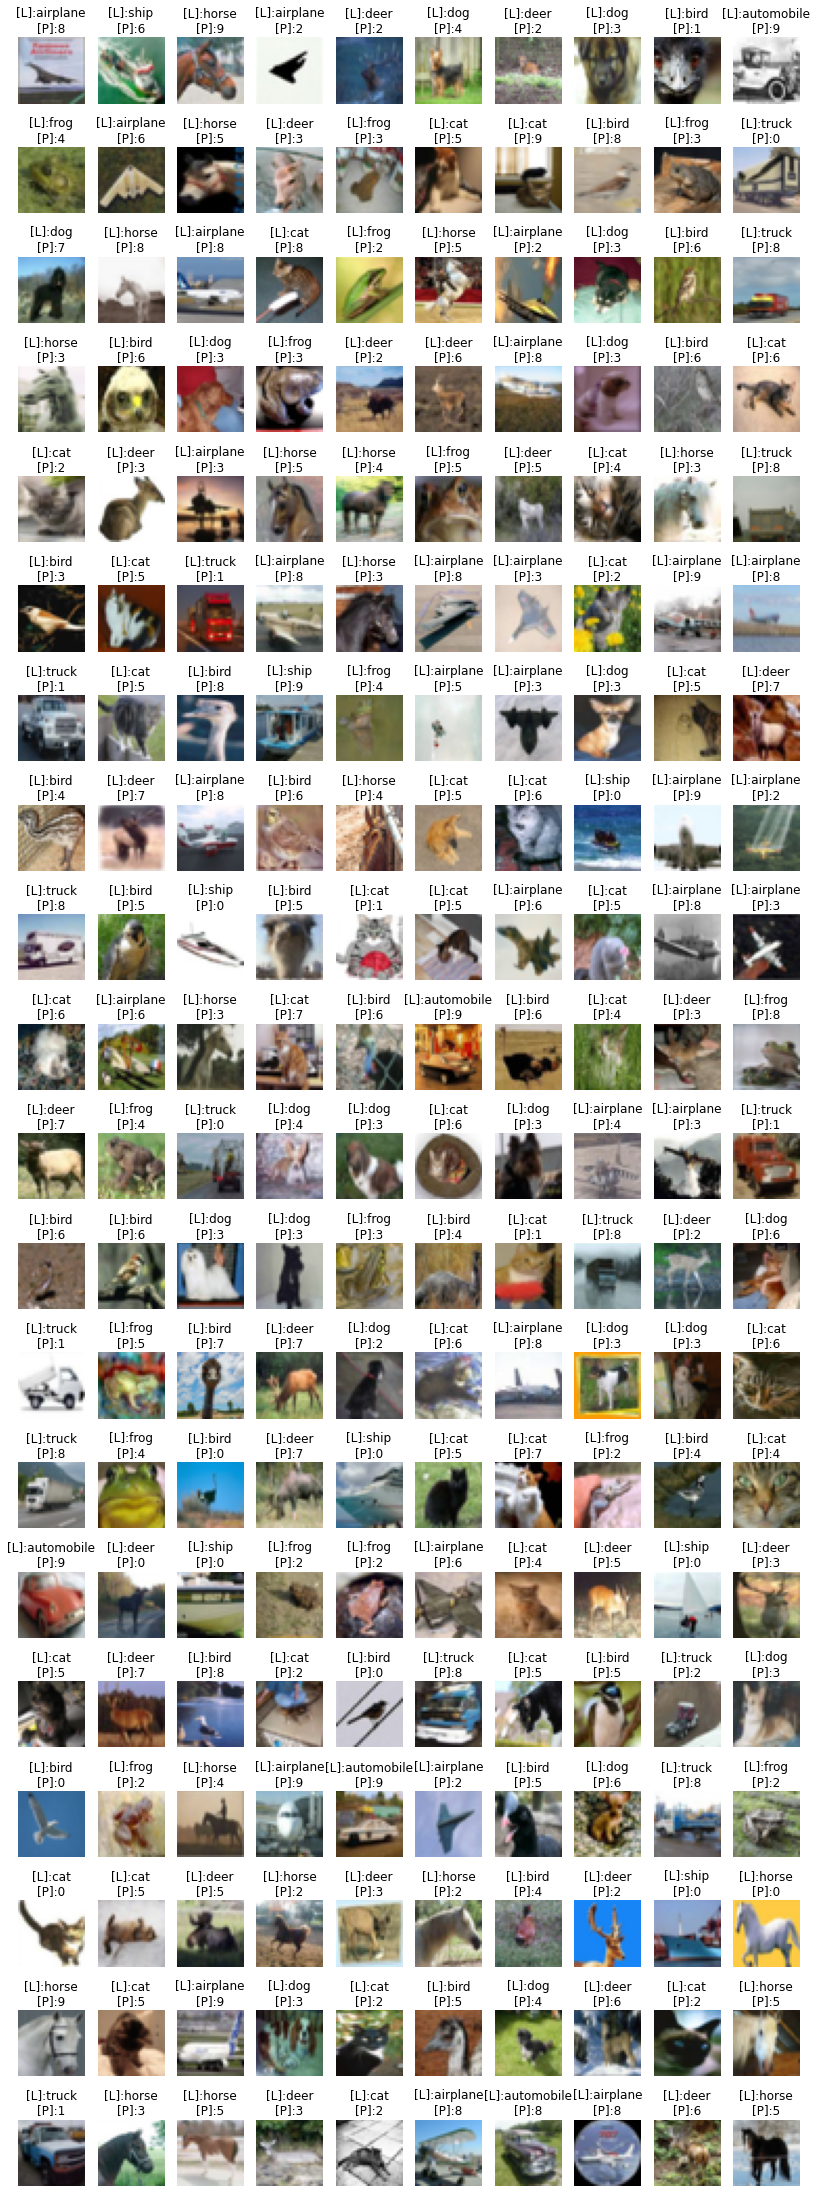

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 畫布寬高
plt.figure(figsize=(14, 42))

# 找到非0值的位置，他可以比較多維度
idx = np.nonzero(pre != y_test_reshape)[0][:200]
width = 10
height = len(idx) // width + 1

for i, d in enumerate(idx):
  img, label, p = x_test[d], y_test[d], pre[d]
  t = f'[L]:{trans[int(label)]}\n[P]:{p}'
  plt.subplot(height, width, i+1)
  plt.title(t)
  plt.axis('off')
  plt.imshow(img)

輸入網址:https://i.guim.co.uk/img/media/0e5ba031e776c312d744077a9aa1467815849e42/923_166_2287_1372/master/2287.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=b723b8f70c073e45b0c5cddbc6e5cade
airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.0
cat 的機率: 0.35
deer 的機率: 0.01
dog 的機率: 0.59
frog 的機率: 0.0
horse 的機率: 0.04
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


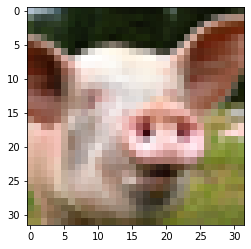

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入網址:")
# 純文字: stream不加, 檔案: stream=True
# verify=False 防火牆調低
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")